## Importing the necessary libraries and reading in the csv

In [1]:
import itertools
import numpy as np
import pandas as pd 
from pandas.plotting import scatter_matrix
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pickle

from sklearn.metrics import mean_squared_error, roc_curve, roc_auc_score, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols
df = pd.read_csv('kc_house_data_train.csv',index_col=0)
print(df.columns)
df.head()

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,...,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,...,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [2]:
# splitting the DataFrame into its features and the control column
control = ['price']
features = ['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [3]:
# Splitting the data for training and testing
x_train, x_test, y_train, y_test = train_test_split(df[features], df[control], test_size=0.33, random_state=42)

Getting a general picture of the correlations between features

In [4]:
x_train.corr()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.003491,0.004651,-0.010623,-0.131186,0.018977,0.001158,0.018505,-0.019370,0.006432,-0.011088,-0.001382,0.017431,-0.010054,-0.014391,-0.004202,0.024050,-0.002136,-0.136295
bedrooms,0.003491,1.000000,0.500410,0.567651,0.013755,0.169140,-0.013132,0.079205,0.034819,0.352471,0.467327,0.305468,0.157084,0.017996,-0.147437,0.003770,0.133360,0.386121,0.018853
bathrooms,0.004651,0.500410,1.000000,0.754987,0.080948,0.502512,0.060162,0.184248,-0.118913,0.665747,0.687031,0.285138,0.512901,0.042966,-0.205735,0.030958,0.230581,0.569915,0.086993
sqft_living,-0.010623,0.567651,0.754987,1.000000,0.168740,0.354907,0.103145,0.281996,-0.049325,0.765143,0.874738,0.442893,0.320253,0.049320,-0.199242,0.059472,0.238832,0.760276,0.178258
sqft_lot,-0.131186,0.013755,0.080948,0.168740,1.000000,-0.002346,0.021413,0.046814,-0.022434,0.116174,0.190848,-0.005275,0.067293,-0.000475,-0.130346,-0.067614,0.224439,0.139485,0.741002
floors,0.018977,0.169140,0.502512,0.354907,-0.002346,1.000000,0.022227,0.026172,-0.256053,0.457141,0.529149,-0.247438,0.486032,0.005488,-0.063541,0.055565,0.136040,0.283610,-0.006742
waterfront,0.001158,-0.013132,0.060162,0.103145,0.021413,0.022227,1.000000,0.408778,0.007985,0.087556,0.065078,0.092208,-0.025108,0.106909,0.032429,-0.016856,-0.050259,0.087434,0.030699
view,0.018505,0.079205,0.184248,0.281996,0.046814,0.026172,0.408778,1.000000,0.053768,0.247202,0.160583,0.284174,-0.056867,0.099962,0.088569,0.011706,-0.087936,0.277916,0.044930
condition,-0.019370,0.034819,-0.118913,-0.049325,-0.022434,-0.256053,0.007985,0.053768,1.000000,-0.129338,-0.150125,0.176080,-0.351770,-0.062953,0.011390,-0.014965,-0.114730,-0.085318,-0.013023
grade,0.006432,0.352471,0.665747,0.765143,0.116174,0.457141,0.087556,0.247202,-0.129338,1.000000,0.760529,0.170089,0.446649,0.000303,-0.191068,0.124168,0.206839,0.720725,0.122414


### Level 1 making a linear model one feature at a time and storing the P values in a DataFrame

In [5]:
# checking the p values for each individual column against the control
list_of_features_and_p_val = []
for feature in features:
    formula = 'price~' + feature
    lm = ols(formula,pd.concat([x_train,y_train],axis=1)).fit()
    intercept_p = lm.pvalues[0]
    p_val = lm.pvalues[1]
    coef_intercept = lm.params[0]
    feature_coef = lm.params[1]
    list_of_features_and_p_val.append( [feature, intercept_p, p_val,coef_intercept,feature_coef])
level_1 = pd.DataFrame(list_of_features_and_p_val,columns=['feature', 'intercept_p_val', 'feature_p_val','coef intercept','feature coef']).sort_values(by='feature_p_val')

In [6]:
level_1

,feature,intercept_p_val,feature_p_val,coef intercept,feature coef
3,bathrooms,8.471342e-01,0.000000e+00,1.661396e+03,2.556135e+05
4,sqft_living,6.831009e-21,0.000000e+00,-5.703629e+04,2.871947e+02
8,view,0.000000e+00,0.000000e+00,4.949389e+05,1.901912e+05
18,sqft_living15,3.391152e-29,0.000000e+00,-9.641421e+04,3.203535e+02
10,grade,0.000000e+00,0.000000e+00,-1.094603e+06,2.136572e+05
11,sqft_above,7.474560e-13,0.000000e+00,4.708195e+04,2.763000e+02
12,sqft_basement,0.000000e+00,3.404879e-289,4.612228e+05,2.744758e+02
2,bedrooms,4.322850e-30,4.065098e-247,1.391129e+05,1.195617e+05
16,lat,1.251363e-236,5.408479e-243,-3.837538e+07,8.182666e+05
7,waterfront,0.000000e+00,1.914104e-184,5.329302e+05,1.081097e+06


### Scaling down the numeric columns

Here I changed the dates from a string to a value equal to a certain amount of days

In [36]:
x_train['date'] = x_train['date'].map(lambda x: (int(x.split('T')[0][:4])*365)+(int(x.split('T')[0][4:6])*30)+(int(x.split('T')[0][6:8])))

In [7]:
features

['id',
 'date',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [50]:
subset_scaled = []
scaler = StandardScaler()
for var in features:
    new_col = var +"_scaled"
    x_train[new_col] = scaler.fit_transform(x_train[[var]])
    subset_scaled.append(new_col)
scaled_control = pd.DataFrame(scaler.fit_transform(y_train),columns=['price_scaled'])
subset_scaled

['id_scaled',
 'date_scaled',
 'bedrooms_scaled',
 'bathrooms_scaled',
 'sqft_living_scaled',
 'sqft_lot_scaled',
 'floors_scaled',
 'waterfront_scaled',
 'view_scaled',
 'condition_scaled',
 'grade_scaled',
 'sqft_above_scaled',
 'sqft_basement_scaled',
 'yr_built_scaled',
 'yr_renovated_scaled',
 'zipcode_scaled',
 'lat_scaled',
 'long_scaled',
 'sqft_living15_scaled',
 'sqft_lot15_scaled']

In [51]:
scaled_features = x_train[['id_scaled',
                     'date_scaled',
                     'bedrooms_scaled',
                     'bathrooms_scaled',
                     'sqft_living_scaled',
                     'sqft_lot_scaled',
                     'floors_scaled',
                     'waterfront_scaled',
                     'view_scaled',
                     'condition_scaled',
                     'grade_scaled',
                     'sqft_above_scaled',
                     'sqft_basement_scaled',
                     'yr_built_scaled',
                     'yr_renovated_scaled',
                     'zipcode_scaled',
                     'lat_scaled',
                     'long_scaled',
                     'sqft_living15_scaled',
                     'sqft_lot15_scaled']]

In [76]:
for f in list(scaled_features)[:4]:
    print(f)

id_scaled
date_scaled
bedrooms_scaled
bathrooms_scaled


In [53]:
scaled_control

,price_scaled
0,-0.400641
1,-0.416659
2,1.182422
3,1.088987
4,-0.385959
...,...
11579,-0.195083
11580,-0.245805
11581,-0.659591
11582,-0.221779


In [55]:
list_of_features_and_p_val_scaled = []
for feature in scaled_features:
    formula = 'price_scaled~' + feature
    lm = ols(formula,pd.concat([scaled_features,scaled_control],axis=1)).fit()
    intercept_p_sc = lm.pvalues[0]
    p_val_sc = lm.pvalues[1]
    coef_intercept_sc = lm.params[0]
    feature_coef_sc = lm.params[1]
    list_of_features_and_p_val_scaled.append( [feature, intercept_p_sc, p_val_sc,coef_intercept_sc,feature_coef_sc])
level_1B = pd.DataFrame(list_of_features_and_p_val_scaled,columns=['feature', 'intercept_p_val', 'feature_p_val','coef intercept','feature coef']).sort_values(by='feature_p_val')

In [56]:
level_1B

,feature,intercept_p_val,feature_p_val,coef intercept,feature coef
6,floors_scaled,0.743392,0.453949,-0.003694,0.008454
3,bathrooms_scaled,0.740703,0.460075,-0.003734,-0.008300
14,yr_renovated_scaled,0.746842,0.475952,-0.003643,0.008260
0,id_scaled,0.741514,0.516220,-0.003722,0.007292
18,sqft_living15_scaled,0.742982,0.615180,-0.003700,-0.005650
11,sqft_above_scaled,0.741596,0.617242,-0.003721,-0.005609
17,long_scaled,0.738563,0.714170,-0.003766,0.004120
4,sqft_living_scaled,0.741711,0.738017,-0.003719,-0.003739
5,sqft_lot_scaled,0.739763,0.764301,-0.003748,-0.003467
13,yr_built_scaled,0.741243,0.786176,-0.003726,0.003057


In [57]:
scaled_features.corr()

,id_scaled,date_scaled,bedrooms_scaled,bathrooms_scaled,sqft_living_scaled,sqft_lot_scaled,floors_scaled,waterfront_scaled,view_scaled,condition_scaled,grade_scaled,sqft_above_scaled,sqft_basement_scaled,yr_built_scaled,yr_renovated_scaled,zipcode_scaled,lat_scaled,long_scaled,sqft_living15_scaled,sqft_lot15_scaled
id_scaled,1.000000,0.005145,0.003491,0.004651,-0.010623,-0.131186,0.018977,0.001158,0.018505,-0.019370,0.006432,-0.011088,-0.001382,0.017431,-0.010054,-0.014391,-0.004202,0.024050,-0.002136,-0.136295
date_scaled,0.005145,1.000000,-0.017344,-0.037906,-0.044926,-0.005655,-0.020002,0.008212,-0.006012,-0.053064,-0.051373,-0.036914,-0.024309,0.006117,-0.012851,-0.003559,-0.032542,0.001427,-0.035454,-0.006812
bedrooms_scaled,0.003491,-0.017344,1.000000,0.500410,0.567651,0.013755,0.169140,-0.013132,0.079205,0.034819,0.352471,0.467327,0.305468,0.157084,0.017996,-0.147437,0.003770,0.133360,0.386121,0.018853
bathrooms_scaled,0.004651,-0.037906,0.500410,1.000000,0.754987,0.080948,0.502512,0.060162,0.184248,-0.118913,0.665747,0.687031,0.285138,0.512901,0.042966,-0.205735,0.030958,0.230581,0.569915,0.086993
sqft_living_scaled,-0.010623,-0.044926,0.567651,0.754987,1.000000,0.168740,0.354907,0.103145,0.281996,-0.049325,0.765143,0.874738,0.442893,0.320253,0.049320,-0.199242,0.059472,0.238832,0.760276,0.178258
sqft_lot_scaled,-0.131186,-0.005655,0.013755,0.080948,0.168740,1.000000,-0.002346,0.021413,0.046814,-0.022434,0.116174,0.190848,-0.005275,0.067293,-0.000475,-0.130346,-0.067614,0.224439,0.139485,0.741002
floors_scaled,0.018977,-0.020002,0.169140,0.502512,0.354907,-0.002346,1.000000,0.022227,0.026172,-0.256053,0.457141,0.529149,-0.247438,0.486032,0.005488,-0.063541,0.055565,0.136040,0.283610,-0.006742
waterfront_scaled,0.001158,0.008212,-0.013132,0.060162,0.103145,0.021413,0.022227,1.000000,0.408778,0.007985,0.087556,0.065078,0.092208,-0.025108,0.106909,0.032429,-0.016856,-0.050259,0.087434,0.030699
view_scaled,0.018505,-0.006012,0.079205,0.184248,0.281996,0.046814,0.026172,0.408778,1.000000,0.053768,0.247202,0.160583,0.284174,-0.056867,0.099962,0.088569,0.011706,-0.087936,0.277916,0.044930
condition_scaled,-0.019370,-0.053064,0.034819,-0.118913,-0.049325,-0.022434,-0.256053,0.007985,0.053768,1.000000,-0.129338,-0.150125,0.176080,-0.351770,-0.062953,0.011390,-0.014965,-0.114730,-0.085318,-0.013023


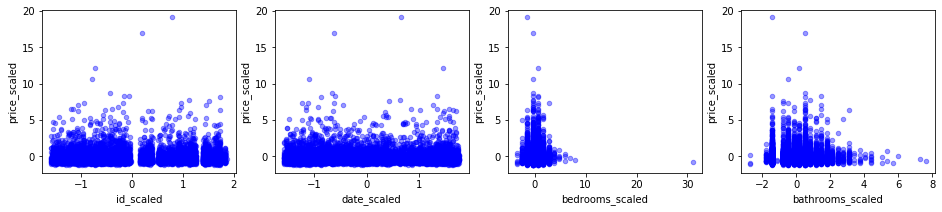

In [78]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))
for xcol, ax in zip(list(scaled_features)[:4], axes):
    pd.concat([scaled_features,scaled_control],axis=1).plot(kind='scatter', x=xcol, y='price_scaled', ax=ax, alpha=0.4, color='b')

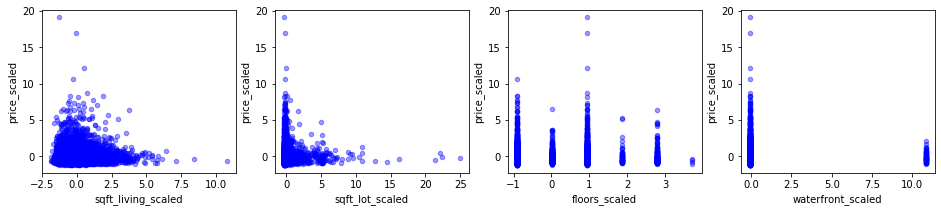

In [79]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))
for xcol, ax in zip(list(scaled_features)[4:8], axes):
    pd.concat([scaled_features,scaled_control],axis=1).plot(kind='scatter', x=xcol, y='price_scaled', ax=ax, alpha=0.4, color='b')

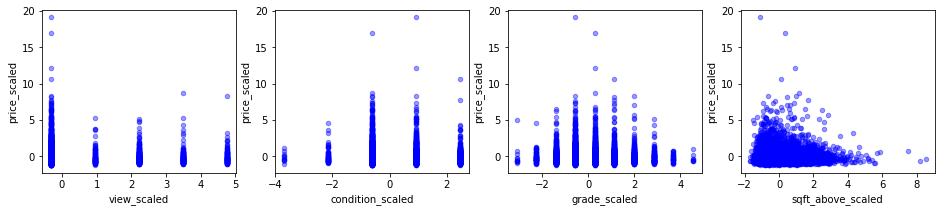

In [80]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))
for xcol, ax in zip(list(scaled_features)[8:12], axes):
    pd.concat([scaled_features,scaled_control],axis=1).plot(kind='scatter', x=xcol, y='price_scaled', ax=ax, alpha=0.4, color='b')

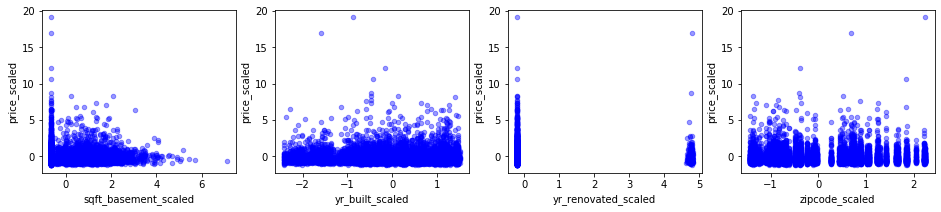

In [81]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))
for xcol, ax in zip(list(scaled_features)[12:16], axes):
    pd.concat([scaled_features,scaled_control],axis=1).plot(kind='scatter', x=xcol, y='price_scaled', ax=ax, alpha=0.4, color='b')

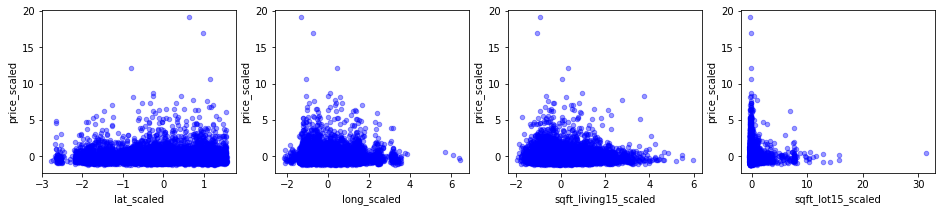

In [82]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))
for xcol, ax in zip(list(scaled_features)[16:20], axes):
    pd.concat([scaled_features,scaled_control],axis=1).plot(kind='scatter', x=xcol, y='price_scaled', ax=ax, alpha=0.4, color='b')